In [1]:
import numpy as np
import matplotlib.pyplot as plt

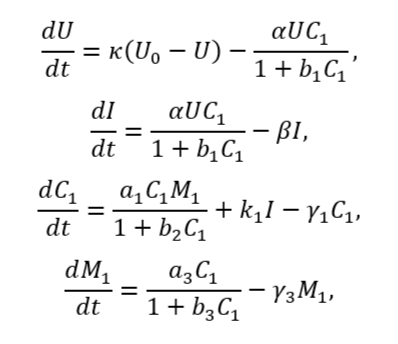


In [2]:
#Parameters of the model
kappa = 0.1
alpha = 0.2
b1 = 0.4
b2 = 0.4
b3 = 0.4
a1 = 0.1
k1 = 0.5
g1 = 0.2
g3 = 0.2
U0 = 2

beta = 0.5
a3=0.2

In [3]:
t=1000

In [6]:
#for accuracy
Q = np.zeros(10)
Step = np.zeros(10)

In [7]:
#number of points & steps
N1 = 10000
N2 = 20000

In [8]:
for n in range (0,10):
    #number of points & steps
    tau1 = t/N1
    tau2 = t/N2
    #arrays
    U1 = np.zeros([N1])
    I1 = np.zeros([N1])
    C1 = np.zeros([N1])
    M1 = np.zeros([N1])
    U2 = np.zeros([N2])
    I2 = np.zeros([N2])
    C2 = np.zeros([N2])
    M2 = np.zeros([N2])
    #initial
    U_0 = 2.0
    I_0 = 0.0
    M1_0 = 0.5
    C1_0 = 0.08
    U1[0] = U_0
    I1[0] = I_0
    M1[0] = M1_0
    C1[0] = C1_0
    U2[0] = U_0
    I2[0] = I_0
    M2[0] = M1_0
    C2[0] = C1_0
    #calculations
    for j in range(1,N1):
        U1[j] = tau1 * (kappa * (U0 - U1[j-1]) - (alpha * U1[j-1] * C1[j-1])/(1 + b1 * C1[j-1])) + U1[j-1]
        I1[j] = tau1 * ((alpha * U1[j-1] * C1[j-1])/(1 + b1 * C1[j-1]) - beta * I1[j-1]) + I1[j-1]
        C1[j] = tau1 * ((a1 * C1[j-1] * M1[j-1])/(1 + b2 * C1[j-1]) + k1 * I1[j-1] - g1 * C1[j-1]) + C1[j-1]
        M1[j] = tau1 * ((a3 * C1[j-1])/(1 + b3 * C1[j-1]) - g3 * M1[j-1]) + M1[j-1]
    for j in range(1,N2):
        U2[j] = tau2 * (kappa * (U0 - U2[j-1]) - (alpha * U2[j-1] * C2[j-1])/(1 + b1 * C2[j-1])) + U2[j-1]
        I2[j] = tau2 * ((alpha * U2[j-1] * C2[j-1])/(1 + b1 * C2[j-1]) - beta * I2[j-1]) + I2[j-1]
        C2[j] = tau2 * ((a1 * C2[j-1] * M2[j-1])/(1 + b2 * C2[j-1]) + k1 * I2[j-1] - g1 * C2[j-1]) + C2[j-1]
        M2[j] = tau2 * ((a3 * C2[j-1])/(1 + b3 * C2[j-1]) - g3 * M2[j-1]) + M2[j-1]
    #accuracy
    Abs = np.zeros([t])
    for k in range (0,t):
        Abs[k] = (abs(C1[int(N1*k/t)] - C2[int(N2*k/t)]))/C2[int(N2*k/t)]
    Q[n] = max(Abs)
    Step[n] = t/N2
    #next
    N1+=10000
    N2+=10000

In [9]:
Q

array([2.83717388e-03, 9.23621954e-04, 4.57762023e-04, 2.73371773e-04,
       1.81714450e-04, 1.29535447e-04, 9.70093267e-05, 7.53675057e-05,
       6.02410154e-05, 4.92530968e-05])

In [10]:
Step

array([0.05      , 0.03333333, 0.025     , 0.02      , 0.01666667,
       0.01428571, 0.0125    , 0.01111111, 0.01      , 0.00909091])

In [11]:
N1

110000

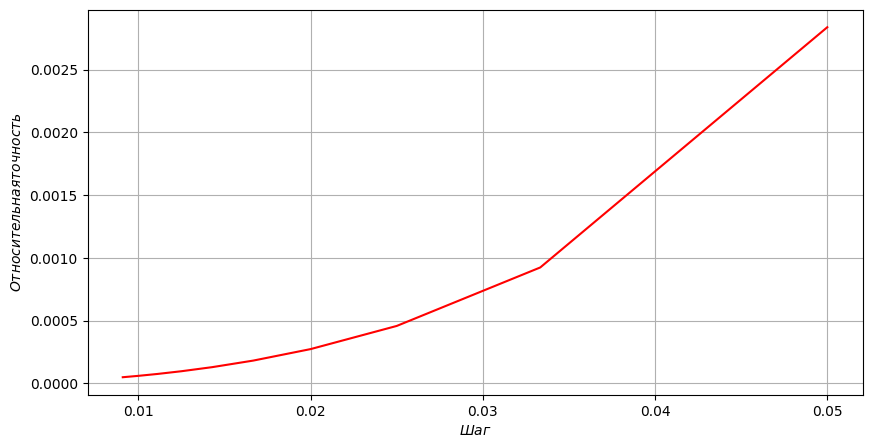

In [12]:
plt.figure(figsize=(10,5))
#plt.title("Dependence of C1 on beta with a3 = 0.2")

plt.plot(Step, Q, c = 'red')


plt.xlabel('$Шаг$')
plt.ylabel('$Относительная точность$')

plt.grid()
plt.show()